# Project 1

In this first project you will create a framework to scope out data science projects. This framework will provide you with a guide to develop a well-articulated problem statement and analysis plan that will be robust and reproducible.

### Read and evaluate the following problem statement: 
Determine which students will get admitted to UCLA, using their academic scoring (GRE and GPA) and the prestige of their high school.

#### 1. What is the outcome?

Answer: Admission (boolean)

#### 2. What are the predictors/covariates? 

Answer: gre, gpa, prestige

#### 3. How many examples are in the data set?

Answer: 400

#### 4. What is the hypothesis?

Answer: Higher GRE, GPA, and prestige will lead to higher probability of admissions

## Let's get started with our dataset

#### 1. Create a data dictionary 

Answer: 

Variable | Description | Type of Variable
---| ---| ---
admit | 0 = no 1 = yes | categorical
gre | thing in unit X | continuous 
gpa | thing in unit X | continuous 
prestige | 1 = low 2 = medium 3 = high | categorical


We would like to explore the association between admit and each of the variables 

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as plt
%matplotlib inline

In [3]:
df = pd.read_csv('/Users/edwardhuang/Desktop/DS-SF-42/unit-project/project-1/assets/admissions.csv')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 4 columns):
admit       400 non-null int64
gre         398 non-null float64
gpa         398 non-null float64
prestige    399 non-null float64
dtypes: float64(3), int64(1)
memory usage: 12.6 KB


There are 400 examples of admissions, with 4 columns (admit, gre, gpa, prestige)

'admit' is the dependent variable that we will be trying to solve for as outcome. 'gre', 'gpa', and 'prestige' are the independent variable predictors we are using.

## Problem Statement

How do we create a model to predict whether a student (given gre, gpa, and prestige) will get into UCLA?

## Explore the Data

### Are there any missing values?

In [5]:
df.isnull().sum()

admit       0
gre         2
gpa         2
prestige    1
dtype: int64

In [6]:
gre = df[df['gre'].isnull()]
gpa = df[df['gpa'].isnull()]
prestige = df[df['prestige'].isnull()]

In [7]:
pd.concat([gre,gpa,prestige]).index.unique()

Int64Index([187, 212, 236], dtype='int64')

Answer: 187, 212, 236 are all rows that have null values somewhere. They will be dropped.

### Drop the rows that have missing values

In [8]:
clean = df.dropna()

In [9]:
clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 397 entries, 0 to 399
Data columns (total 4 columns):
admit       397 non-null int64
gre         397 non-null float64
gpa         397 non-null float64
prestige    397 non-null float64
dtypes: float64(3), int64(1)
memory usage: 15.5 KB


In [10]:
clean.describe()

,admit,gre,gpa,prestige
count,397.000000,397.000000,397.000000,397.000000
mean,0.317380,587.858942,3.392242,2.488665
std,0.466044,115.717787,0.380208,0.947083
min,0.000000,220.000000,2.260000,1.000000
25%,0.000000,520.000000,3.130000,2.000000
50%,0.000000,580.000000,3.400000,2.000000
75%,1.000000,660.000000,3.670000,3.000000
max,1.000000,800.000000,4.000000,4.000000


### Which X variable is most correlated to the admit outcome?

In [11]:
clean.corr()

,admit,gre,gpa,prestige
admit,1.000000,0.181202,0.174116,-0.243563
gre,0.181202,1.000000,0.382408,-0.124533
gpa,0.174116,0.382408,1.000000,-0.060976
prestige,-0.243563,-0.124533,-0.060976,1.000000


Answer: Looks like GRE and GPA both have slight positive correlations to admission, while prestige has a negative correlation

Why does higher prestige correlate to lower GRE, GPA, and less admission chance?

### Plot the histograms of each variable

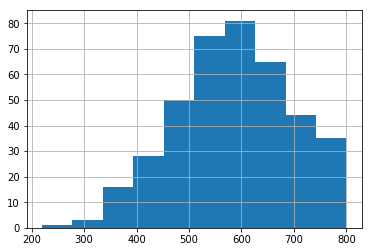

In [12]:
df.gre.hist()

GRE has a left tail skew because there is a hard ceiling at 800

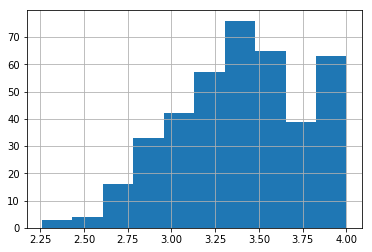

In [13]:
df.gpa.hist()

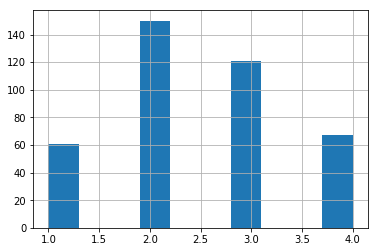

In [14]:
df.prestige.hist()

The mode prestige is 2, there are fewer 1s and 4s

### Plot the boxplots of each variable

gpa            AxesSubplot(0.125,0.125;0.227941x0.755)
gre         AxesSubplot(0.398529,0.125;0.227941x0.755)
prestige    AxesSubplot(0.672059,0.125;0.227941x0.755)
dtype: object

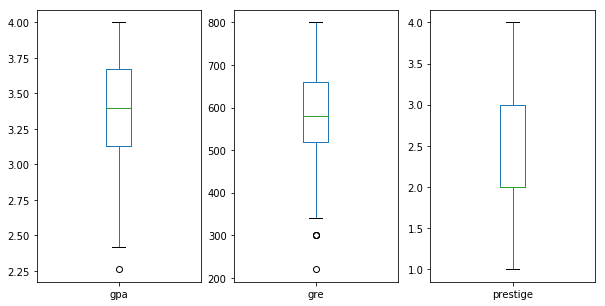

In [15]:
clean[['gpa','gre','prestige']].plot(kind = 'box',subplots = True,figsize = (10,5))

GPA and GRE both have outliers to the bottom, which supports the skew to the downside that we saw in the histograms

In [30]:
from sklearn.model_selection import train_test_split

In [31]:
x = clean[['gpa','gre','prestige']]
y = clean['admit']

In [53]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.25)

In [54]:
from sklearn.linear_model import LogisticRegression

In [55]:
logmodel = LogisticRegression()
logmodel.fit(x_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [56]:
predictions = logmodel.predict(x_test)

In [57]:
from sklearn.metrics import classification_report

In [58]:
print(classification_report(y_test, predictions))

             precision    recall  f1-score   support

          0       0.66      0.97      0.78        62
          1       0.78      0.18      0.30        38

avg / total       0.70      0.67      0.60       100



#### 2. What is the outcome?

Answer:

#### 3. What are the predictors/covariates? 

Answer:

#### 4. What timeframe is this data relevent for?

Answer:

#### 4. What is the hypothesis?

Answer:

    Using the above information, write a well-formed problem statement. 


## Problem Statement

### Exploratory Analysis Plan

Using the lab from a class as a guide, create an exploratory analysis plan. 

#### 1. What are the goals of the exploratory analysis? 

Answer: 

#### 2a. What are the assumptions of the distribution of data? 

Answer:

#### 2b. How will determine the distribution of your data? 

Answer: 

#### 3a. How might outliers impact your analysis? 

Answer: 

#### 3b. How will you test for outliers? 

Answer:

#### 4a. What is colinearity? 

Answer: 

#### 4b. How will you test for colinearity? 

Answer:

#### 5. What is your exploratory analysis plan?
Using the above information, write an exploratory analysis plan that would allow you or a colleague to reproduce your analysis 1 year from now. 

Answer: 

## Bonus Questions:
1. Outline your analysis method for predicting your outcome
2. Write an alternative problem statement for your dataset
3. Articulate the assumptions and risks of the alternative model